https://blog.amedama.jp/entry/2019/01/29/235642

# 乳がんデータセットを分類してみる

まずはハローワールド的な例として乳がんデータセットを使った二値分類 (Binary classification) から始める。

以下が XGBoost を使って乳がんデータセットを二値分類するサンプルコード。 なお、モデルの検証についてはここでの本題ではないことから、交差検証ではなくホールドアウト検証にとどめている。 最終的に検証用データで精度 (Accuracy) を確認している。 コードの説明についてはコメントを参照のこと。

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import xgboost as xgb

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

"""XGBoost で二値分類するサンプルコード"""

In [2]:
#データセットを読み込む
dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target

In [5]:
#データセットを学習用と検証用に分割する
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   #shuffle=True,
                                                   random_state=42,
                                                   stratify=y)

In [6]:
#XGBoostが扱うデータセットの形式に直す
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [13]:
#学習用のパラメータ
xgb_params = {
    # 二値分類問題
    "objective":"binary:logistic",
    #評価指標
    "eval_metric":"logloss",
}

In [14]:
#モデルを学習する
bst = xgb.train(xgb_params,
               dtrain,
               num_boost_round=100, #学習ラウンド数は適当
               )

In [15]:
#検証用データが各クラスに分類される確率を計算する
y_pred_proba = bst.predict(dtest)

In [16]:
#しきい値0.5で0, 1に丸める
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

In [17]:
# 精度（Accuracy）を検証する
acc = accuracy_score(y_test, y_pred)
print('Accuracy:',acc)

Accuracy: 0.9649122807017544


# 学習過程を可視化する
先ほどの例では、いつの間にか学習が終わってモデルができたという感じだった。 そこで、続いては学習が進む過程をグラフで可視化してみる。

次のサンプルコードでは、学習用データと検証用データに対する損失を折れ線グラフで出力する。 そのためには、まず evals オプションで学習用データと検証用データを渡す。 その上で evals_result オプションに過程を記録するための辞書を渡す。 学習ラウンド数 (num_boost_round) は先ほどよりも多く 1000 まで増やした。

In [18]:
from matplotlib import pyplot as plt

"""XGBoost で学習の履歴を可視化するサンプルコード"""

In [19]:
dataset2 = datasets.load_breast_cancer()
X2, y2 = dataset2.data, dataset2.target

In [20]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,
                                                       test_size=0.3,
                                                       random_state=42,
                                                       stratify=y2)

In [21]:
dtrain2 = xgb.DMatrix(X_train2, label=y_train2)
dtest2 = xgb.DMatrix(X_test2,label=y_test2)

In [22]:
xgb_params2 = {
    "objective":"binary:logistic",
    "eval_metric":"logloss",
}

In [23]:
#学習用に用いる検証用データ
evals = [(dtrain2, 'train2'),(dtest2, 'eval')]

In [25]:
#学習過程を記録するための辞書
evals_result = {}
bst2 = xgb.train(xgb_params2,
               dtrain2,
               num_boost_round=1000, #ラウンド数を増やしておく
               evals=evals,
               evals_result=evals_result,
               )

[0]	train2-logloss:0.462396	eval-logloss:0.492899
[1]	train2-logloss:0.33344	eval-logloss:0.376018
[2]	train2-logloss:0.249744	eval-logloss:0.308367
[3]	train2-logloss:0.191682	eval-logloss:0.261622
[4]	train2-logloss:0.150868	eval-logloss:0.228367
[5]	train2-logloss:0.120113	eval-logloss:0.202084
[6]	train2-logloss:0.096149	eval-logloss:0.176139
[7]	train2-logloss:0.079418	eval-logloss:0.161773
[8]	train2-logloss:0.066686	eval-logloss:0.150441
[9]	train2-logloss:0.056647	eval-logloss:0.146488
[10]	train2-logloss:0.048286	eval-logloss:0.136278
[11]	train2-logloss:0.042394	eval-logloss:0.132442
[12]	train2-logloss:0.037358	eval-logloss:0.121733
[13]	train2-logloss:0.033187	eval-logloss:0.117181
[14]	train2-logloss:0.029256	eval-logloss:0.112603
[15]	train2-logloss:0.02656	eval-logloss:0.111685
[16]	train2-logloss:0.024288	eval-logloss:0.110391
[17]	train2-logloss:0.022631	eval-logloss:0.113695
[18]	train2-logloss:0.020823	eval-logloss:0.111814
[19]	train2-logloss:0.019022	eval-logloss:0

[161]	train2-logloss:0.005472	eval-logloss:0.091666
[162]	train2-logloss:0.005467	eval-logloss:0.091726
[163]	train2-logloss:0.005462	eval-logloss:0.091568
[164]	train2-logloss:0.005458	eval-logloss:0.091556
[165]	train2-logloss:0.005454	eval-logloss:0.091417
[166]	train2-logloss:0.00545	eval-logloss:0.091489
[167]	train2-logloss:0.005446	eval-logloss:0.091547
[168]	train2-logloss:0.005442	eval-logloss:0.091745
[169]	train2-logloss:0.005439	eval-logloss:0.091797
[170]	train2-logloss:0.005439	eval-logloss:0.091797
[171]	train2-logloss:0.005439	eval-logloss:0.091797
[172]	train2-logloss:0.005439	eval-logloss:0.091797
[173]	train2-logloss:0.005439	eval-logloss:0.091797
[174]	train2-logloss:0.005439	eval-logloss:0.091797
[175]	train2-logloss:0.005439	eval-logloss:0.091797
[176]	train2-logloss:0.005439	eval-logloss:0.091797
[177]	train2-logloss:0.005439	eval-logloss:0.091797
[178]	train2-logloss:0.005439	eval-logloss:0.091797
[179]	train2-logloss:0.005439	eval-logloss:0.091797
[180]	train2-

[319]	train2-logloss:0.005439	eval-logloss:0.091797
[320]	train2-logloss:0.005439	eval-logloss:0.091797
[321]	train2-logloss:0.005439	eval-logloss:0.091797
[322]	train2-logloss:0.005439	eval-logloss:0.091797
[323]	train2-logloss:0.005439	eval-logloss:0.091797
[324]	train2-logloss:0.005439	eval-logloss:0.091797
[325]	train2-logloss:0.005439	eval-logloss:0.091797
[326]	train2-logloss:0.005439	eval-logloss:0.091797
[327]	train2-logloss:0.005439	eval-logloss:0.091797
[328]	train2-logloss:0.005439	eval-logloss:0.091797
[329]	train2-logloss:0.005439	eval-logloss:0.091797
[330]	train2-logloss:0.005439	eval-logloss:0.091797
[331]	train2-logloss:0.005439	eval-logloss:0.091797
[332]	train2-logloss:0.005439	eval-logloss:0.091797
[333]	train2-logloss:0.005439	eval-logloss:0.091797
[334]	train2-logloss:0.005439	eval-logloss:0.091797
[335]	train2-logloss:0.005439	eval-logloss:0.091797
[336]	train2-logloss:0.005439	eval-logloss:0.091797
[337]	train2-logloss:0.005439	eval-logloss:0.091797
[338]	train2

[477]	train2-logloss:0.005439	eval-logloss:0.091797
[478]	train2-logloss:0.005439	eval-logloss:0.091797
[479]	train2-logloss:0.005439	eval-logloss:0.091797
[480]	train2-logloss:0.005439	eval-logloss:0.091797
[481]	train2-logloss:0.005439	eval-logloss:0.091797
[482]	train2-logloss:0.005439	eval-logloss:0.091797
[483]	train2-logloss:0.005439	eval-logloss:0.091797
[484]	train2-logloss:0.005439	eval-logloss:0.091797
[485]	train2-logloss:0.005439	eval-logloss:0.091797
[486]	train2-logloss:0.005439	eval-logloss:0.091797
[487]	train2-logloss:0.005439	eval-logloss:0.091797
[488]	train2-logloss:0.005439	eval-logloss:0.091797
[489]	train2-logloss:0.005439	eval-logloss:0.091797
[490]	train2-logloss:0.005439	eval-logloss:0.091797
[491]	train2-logloss:0.005439	eval-logloss:0.091797
[492]	train2-logloss:0.005439	eval-logloss:0.091797
[493]	train2-logloss:0.005439	eval-logloss:0.091797
[494]	train2-logloss:0.005439	eval-logloss:0.091797
[495]	train2-logloss:0.005439	eval-logloss:0.091797
[496]	train2

[635]	train2-logloss:0.005439	eval-logloss:0.091797
[636]	train2-logloss:0.005439	eval-logloss:0.091797
[637]	train2-logloss:0.005439	eval-logloss:0.091797
[638]	train2-logloss:0.005439	eval-logloss:0.091797
[639]	train2-logloss:0.005439	eval-logloss:0.091797
[640]	train2-logloss:0.005439	eval-logloss:0.091797
[641]	train2-logloss:0.005439	eval-logloss:0.091797
[642]	train2-logloss:0.005439	eval-logloss:0.091797
[643]	train2-logloss:0.005439	eval-logloss:0.091797
[644]	train2-logloss:0.005439	eval-logloss:0.091797
[645]	train2-logloss:0.005439	eval-logloss:0.091797
[646]	train2-logloss:0.005439	eval-logloss:0.091797
[647]	train2-logloss:0.005439	eval-logloss:0.091797
[648]	train2-logloss:0.005439	eval-logloss:0.091797
[649]	train2-logloss:0.005439	eval-logloss:0.091797
[650]	train2-logloss:0.005439	eval-logloss:0.091797
[651]	train2-logloss:0.005439	eval-logloss:0.091797
[652]	train2-logloss:0.005439	eval-logloss:0.091797
[653]	train2-logloss:0.005439	eval-logloss:0.091797
[654]	train2

[793]	train2-logloss:0.005439	eval-logloss:0.091797
[794]	train2-logloss:0.005439	eval-logloss:0.091797
[795]	train2-logloss:0.005439	eval-logloss:0.091797
[796]	train2-logloss:0.005439	eval-logloss:0.091797
[797]	train2-logloss:0.005439	eval-logloss:0.091797
[798]	train2-logloss:0.005439	eval-logloss:0.091797
[799]	train2-logloss:0.005439	eval-logloss:0.091797
[800]	train2-logloss:0.005439	eval-logloss:0.091797
[801]	train2-logloss:0.005439	eval-logloss:0.091797
[802]	train2-logloss:0.005439	eval-logloss:0.091797
[803]	train2-logloss:0.005439	eval-logloss:0.091797
[804]	train2-logloss:0.005439	eval-logloss:0.091797
[805]	train2-logloss:0.005439	eval-logloss:0.091797
[806]	train2-logloss:0.005439	eval-logloss:0.091797
[807]	train2-logloss:0.005439	eval-logloss:0.091797
[808]	train2-logloss:0.005439	eval-logloss:0.091797
[809]	train2-logloss:0.005439	eval-logloss:0.091797
[810]	train2-logloss:0.005439	eval-logloss:0.091797
[811]	train2-logloss:0.005439	eval-logloss:0.091797
[812]	train2

[951]	train2-logloss:0.005439	eval-logloss:0.091797
[952]	train2-logloss:0.005439	eval-logloss:0.091797
[953]	train2-logloss:0.005439	eval-logloss:0.091797
[954]	train2-logloss:0.005439	eval-logloss:0.091797
[955]	train2-logloss:0.005439	eval-logloss:0.091797
[956]	train2-logloss:0.005439	eval-logloss:0.091797
[957]	train2-logloss:0.005439	eval-logloss:0.091797
[958]	train2-logloss:0.005439	eval-logloss:0.091797
[959]	train2-logloss:0.005439	eval-logloss:0.091797
[960]	train2-logloss:0.005439	eval-logloss:0.091797
[961]	train2-logloss:0.005439	eval-logloss:0.091797
[962]	train2-logloss:0.005439	eval-logloss:0.091797
[963]	train2-logloss:0.005439	eval-logloss:0.091797
[964]	train2-logloss:0.005439	eval-logloss:0.091797
[965]	train2-logloss:0.005439	eval-logloss:0.091797
[966]	train2-logloss:0.005439	eval-logloss:0.091797
[967]	train2-logloss:0.005439	eval-logloss:0.091797
[968]	train2-logloss:0.005439	eval-logloss:0.091797
[969]	train2-logloss:0.005439	eval-logloss:0.091797
[970]	train2

In [26]:
y_pred_proba2 = bst2.predict(dtest2)
y_pred2 = np.where(y_pred_proba2 > 0.5,1,0)
acc2 = accuracy_score(y_test2,y_pred2)
print('Accuracy2:',acc2)

Accuracy2: 0.9649122807017544


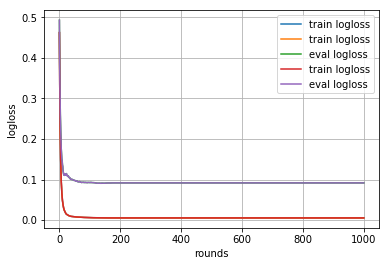

In [31]:
#学習の過程を折れ線グラフとしてプロットする
train_metric = evals_result['train2']['logloss']
plt.plot(train_metric, label='train logloss')
eval_metric = evals_result['eval']['logloss']
plt.plot(eval_metric, label='eval logloss')
plt.grid()
plt.legend()
plt.xlabel('rounds')
plt.ylabel('logloss')
plt.show()